In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cubic_zirconia.csv")

In [3]:
#Overview of dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#Shape of the dataframe
df.shape

(26967, 11)

The dataframe has 26967 rows and 11 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


* Numerical variables: carat, depth, table, x, y, z
* Categorical variables: cut, color, clarity

## Data cleaning

Since pandas already provides with an index column, the "Unnamed: 0" column in redundant.

In [6]:
#Dropping the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#34 duplicate rows dropped
df.shape

(26933, 10)

In [9]:
#Overview of stats
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


We can see in the above matrix that the minimum values for x(length), y(width) and h(height) are 0.
This is practically not possible so drop these entries from the dataset.

In [10]:
df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)] 

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [11]:
len(df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)]) / len(df) * 100

0.02970333791259793

These values account for < 1% of the dataframe, hence we can drop these.

In [12]:
drop_values = df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)] 
drop_values.index

Int64Index([5821, 6034, 10827, 12498, 12689, 17506, 18194, 23758], dtype='int64')

In [13]:
df = df.drop(drop_values.index,axis=0)

In [14]:
#8 rows dropped
df.shape

(26925, 10)

## Outlier treatment

In [15]:
#numeric columns
cols = ["carat","depth","table","x","y","z","price"]

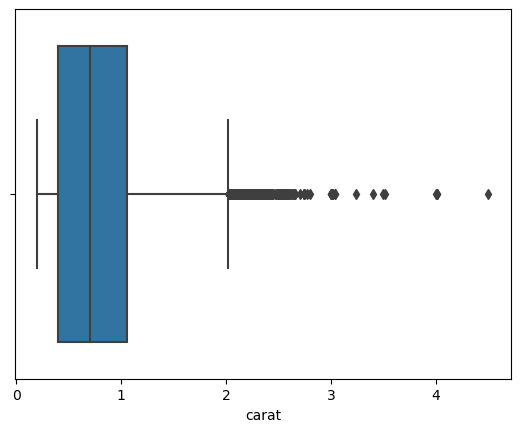

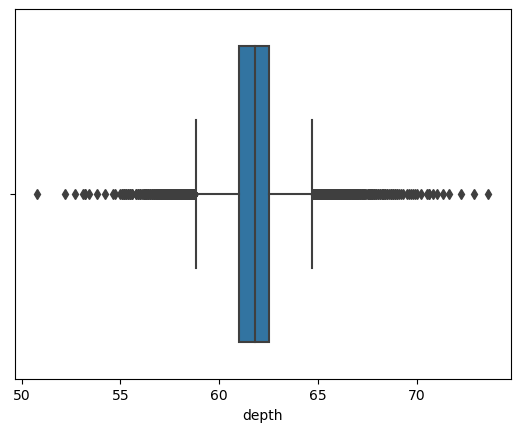

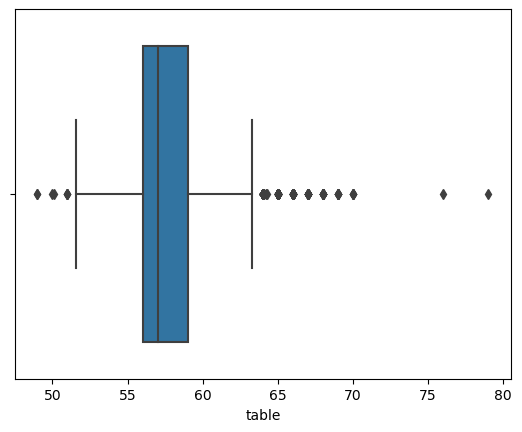

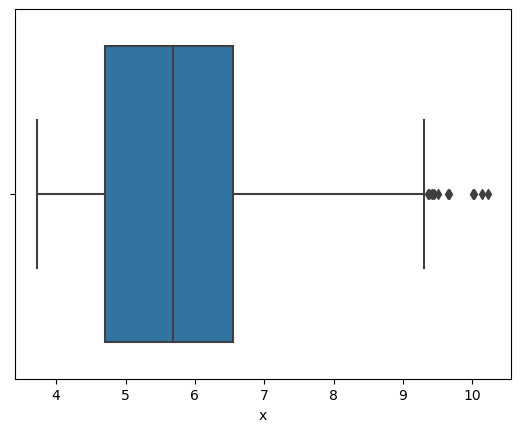

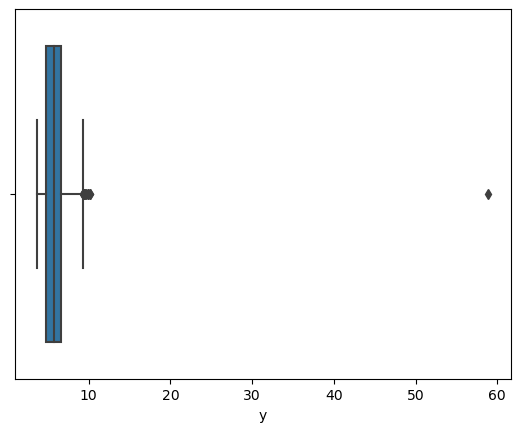

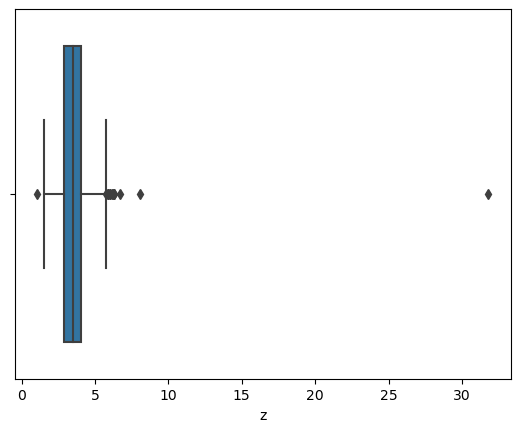

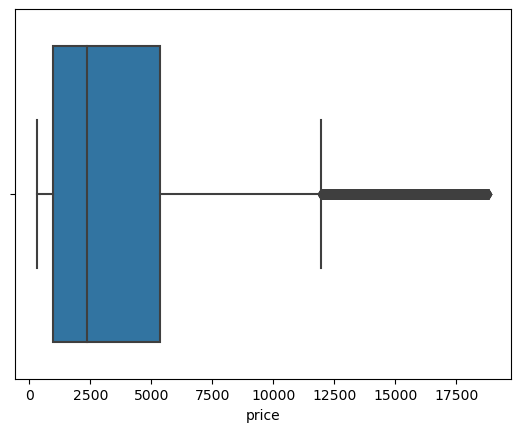

In [16]:
for col in cols:
    sns.boxplot(data=df,x=col)
    plt.show()

In [17]:
def return_range(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1    #calculating inter-quartile range
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    return lower,upper

In [18]:
#function to replace outliers with upper and lower values
def outliers(cols):
    for col in cols:
        lower,upper = return_range(df[col])
        df[col] = np.where(df[col]>upper,upper,df[col])    
        df[col] = np.where(df[col]<lower,lower,df[col])

In [19]:
outliers(cols)

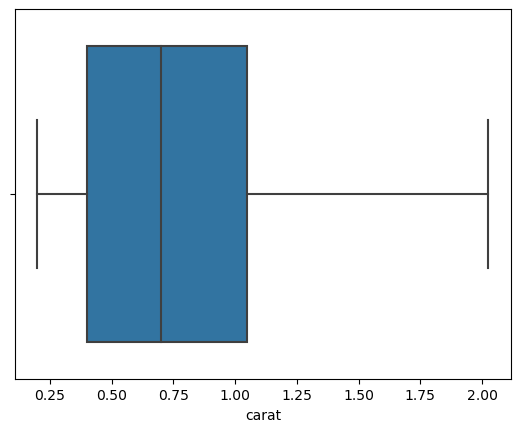

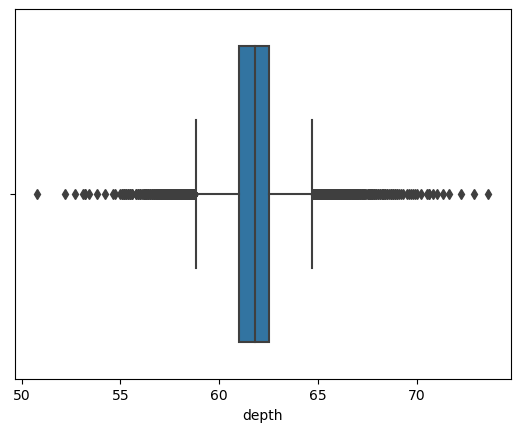

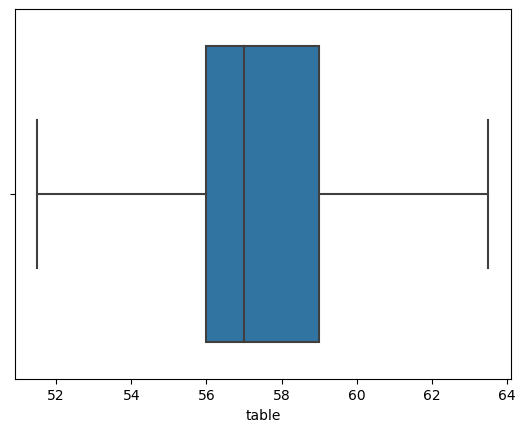

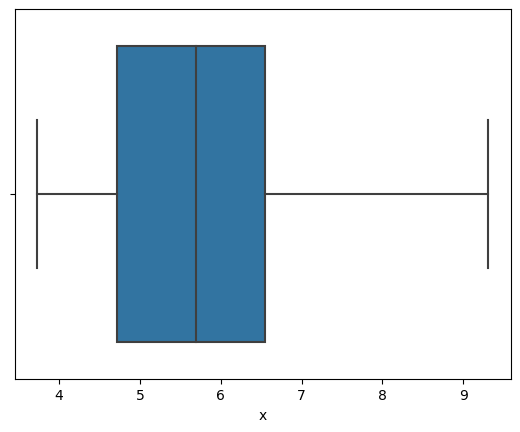

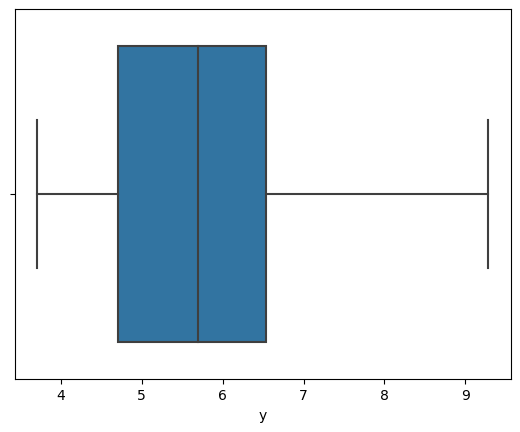

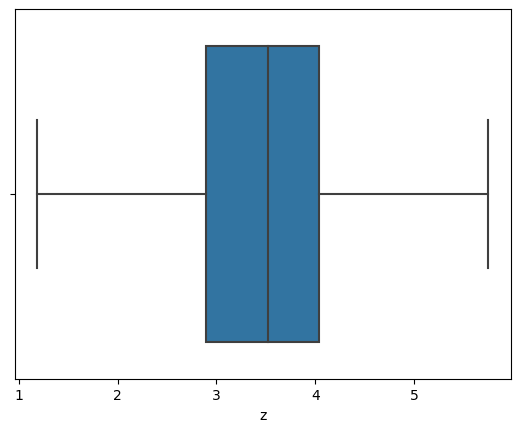

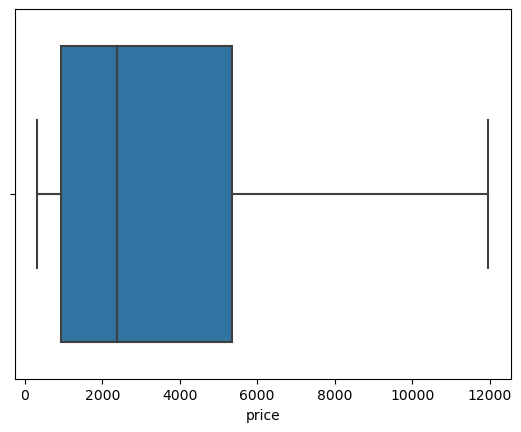

In [20]:
for col in cols:
    sns.boxplot(data=df,x=col)
    plt.show()

##  Filling missing values

In [21]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [22]:
# Filling missing values in "depth" column with median 
df["depth"] = df["depth"].fillna(df["depth"].median())

In [23]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Univariate analysis

In [24]:
df.skew()

carat    0.917214
depth   -0.028403
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

carat and price are highly skewed

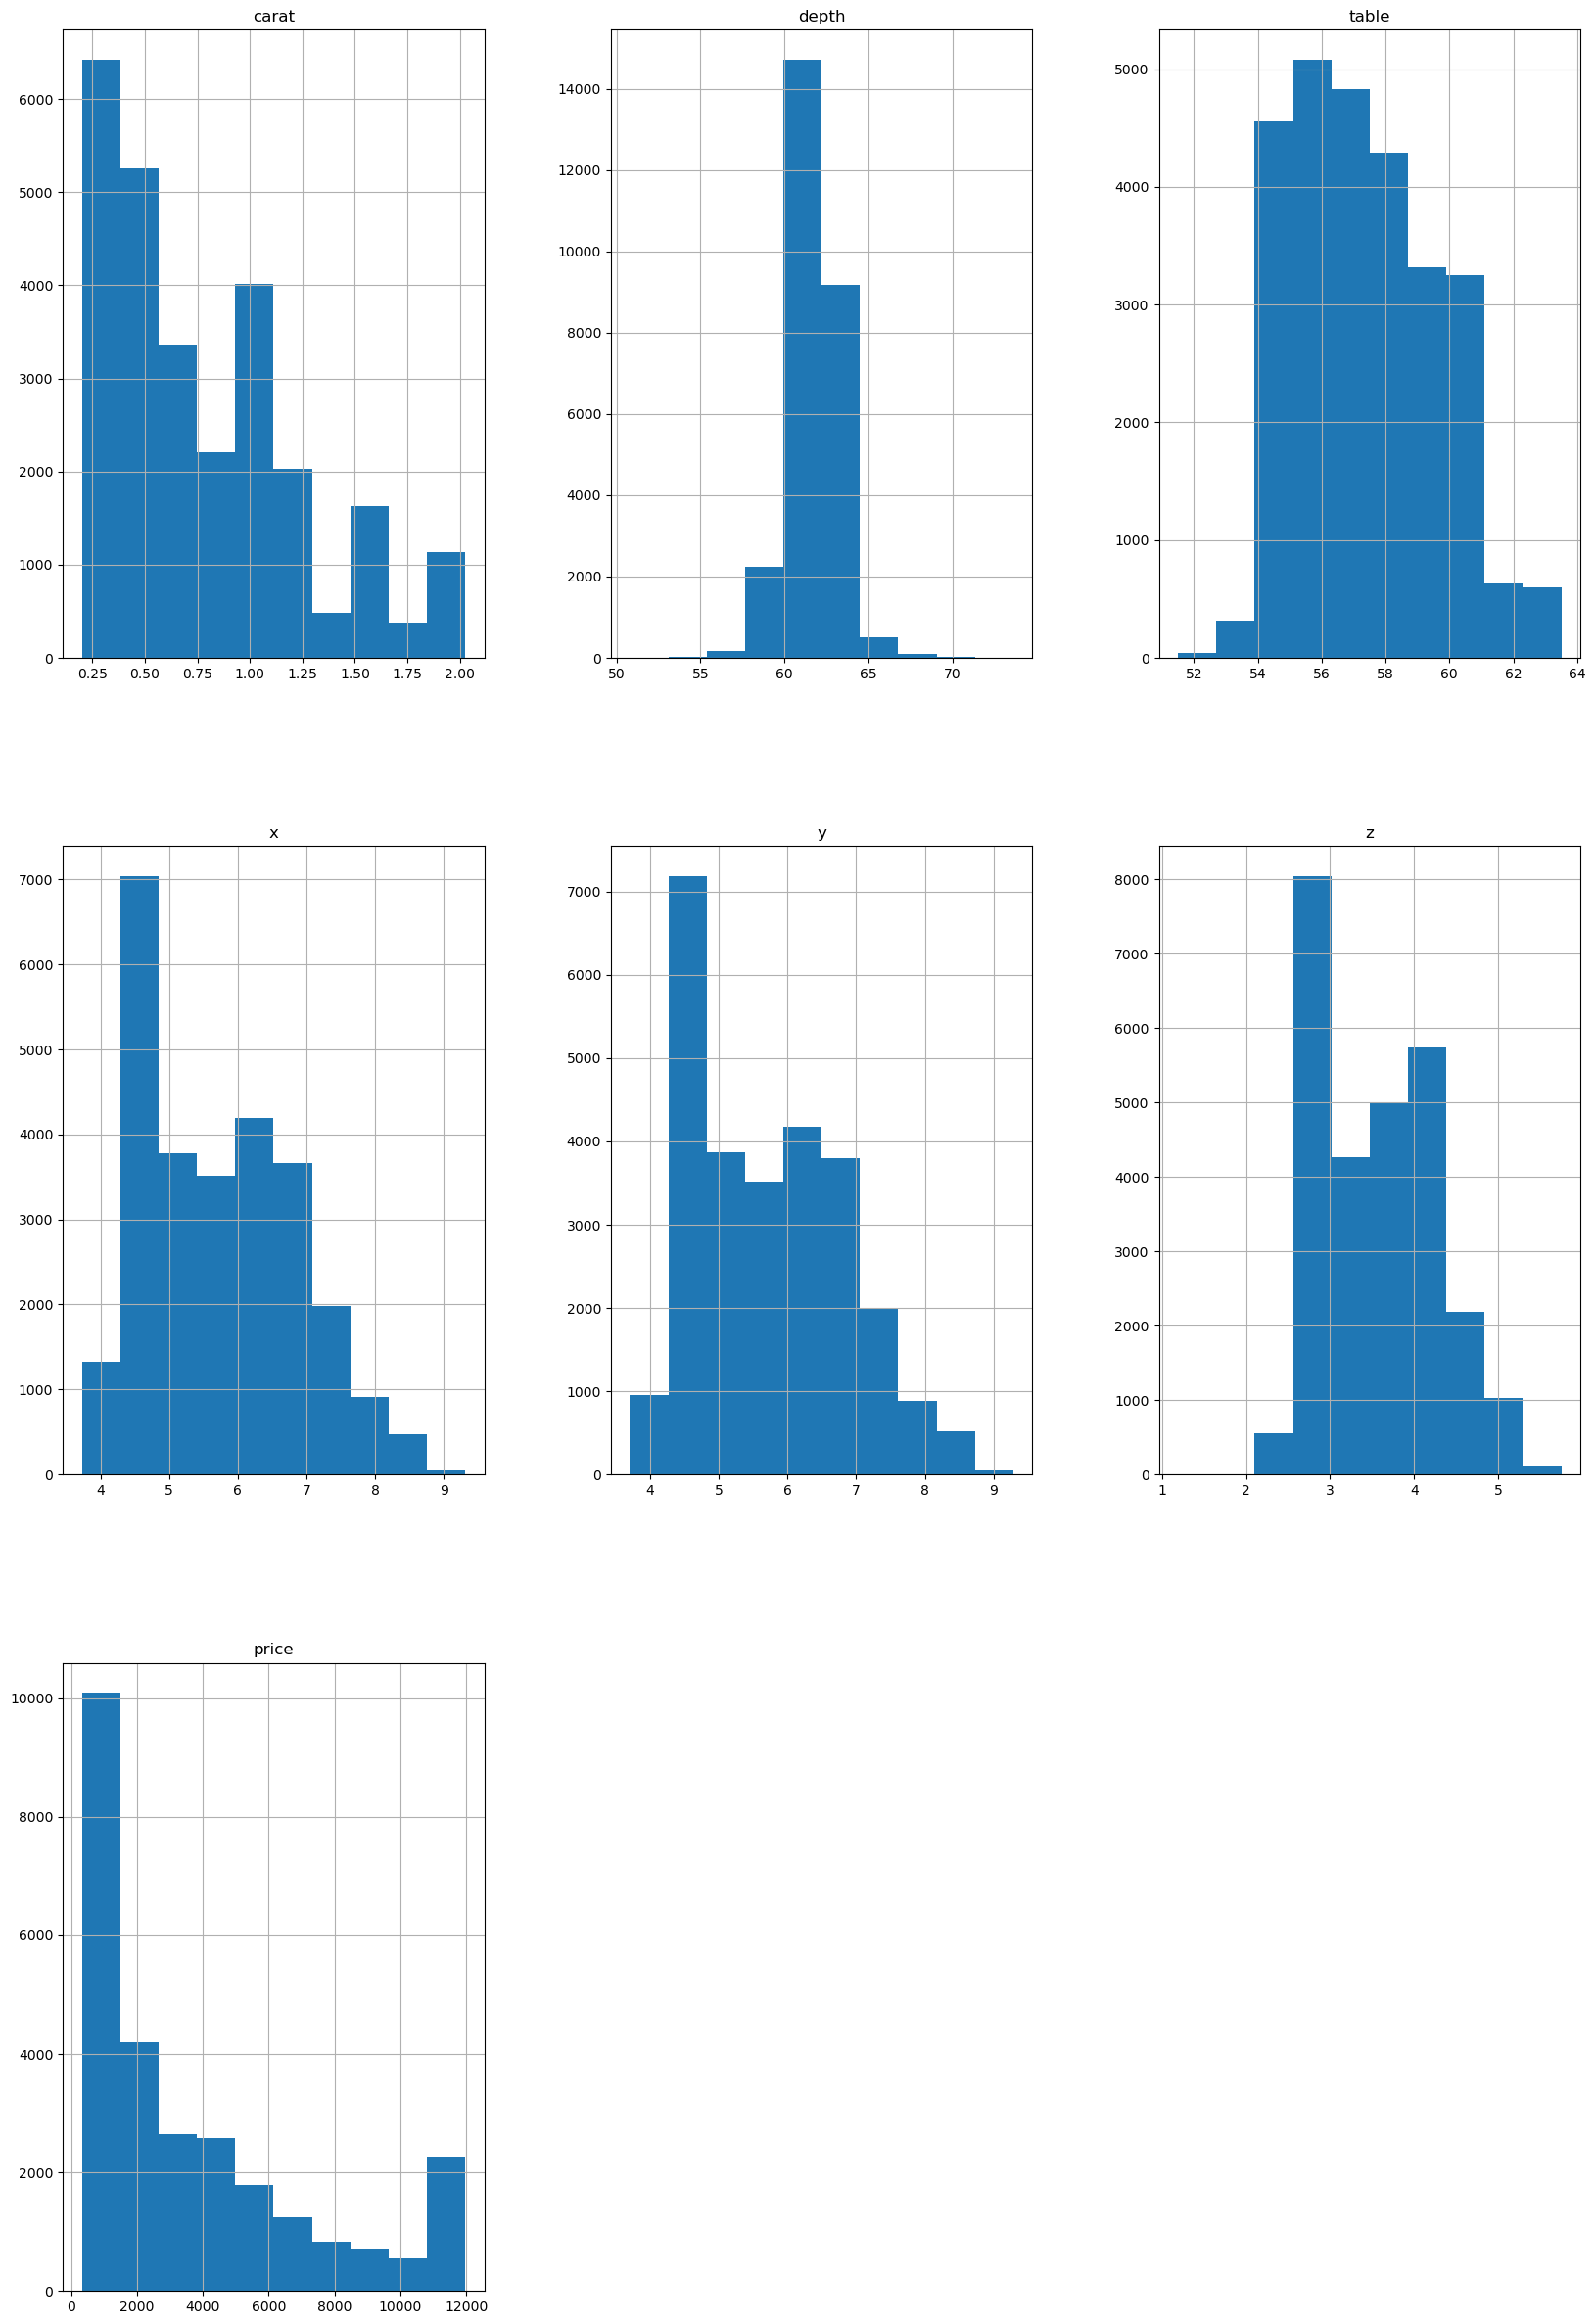

In [25]:
df.hist(figsize=(20,30))
plt.show()

## Bivariate analysis for numeric variables

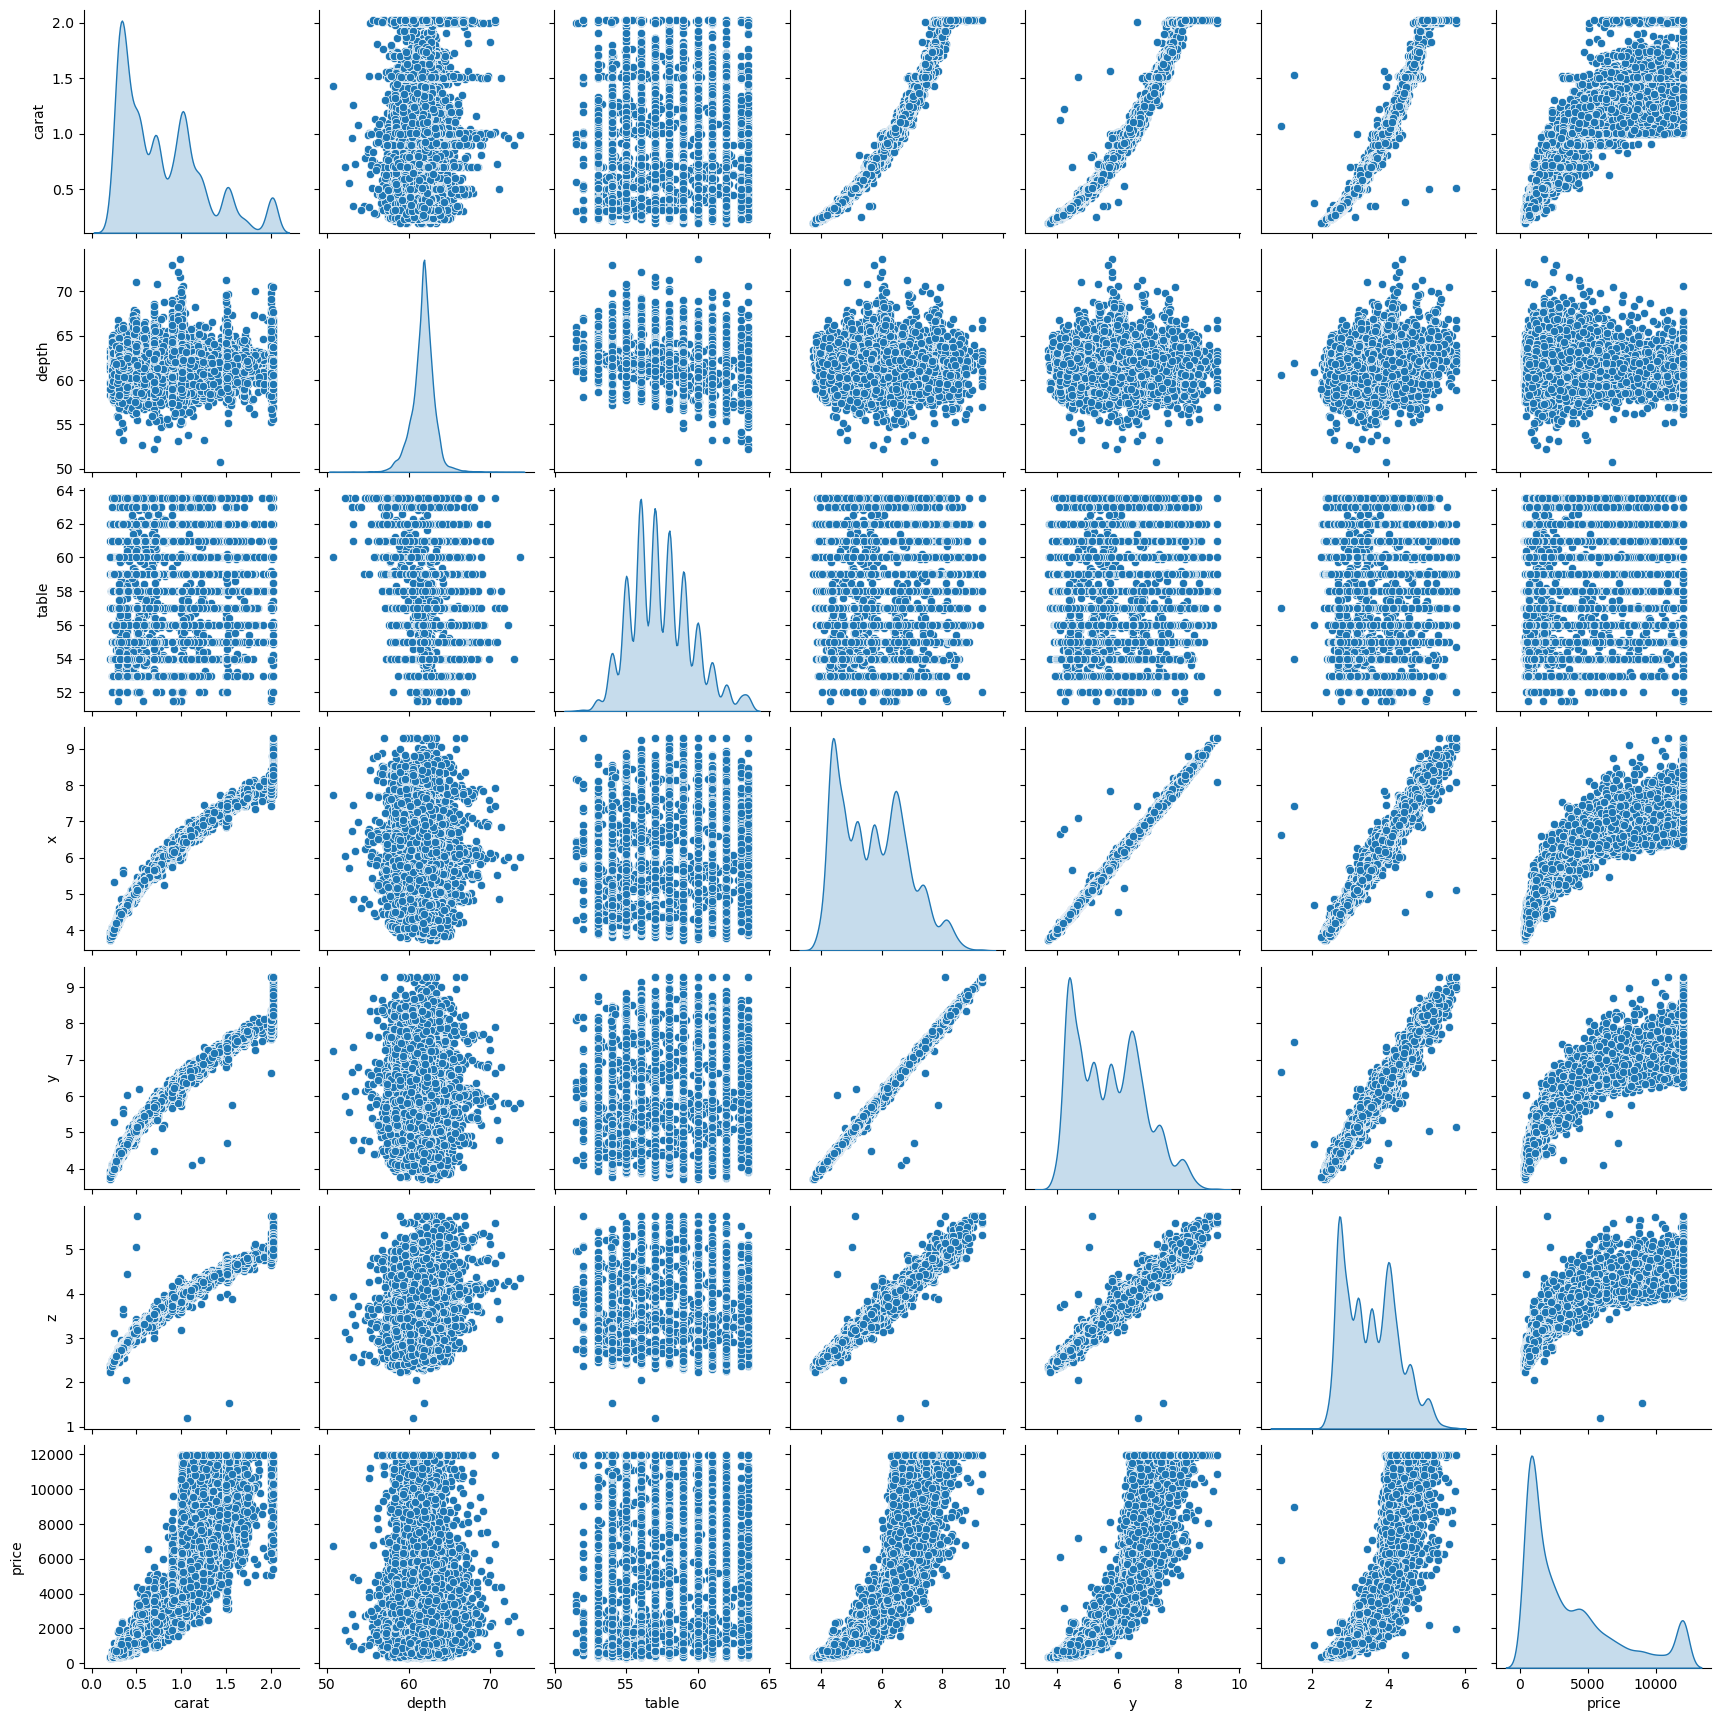

In [26]:
sns.pairplot(data=df,diag_kind="kde")

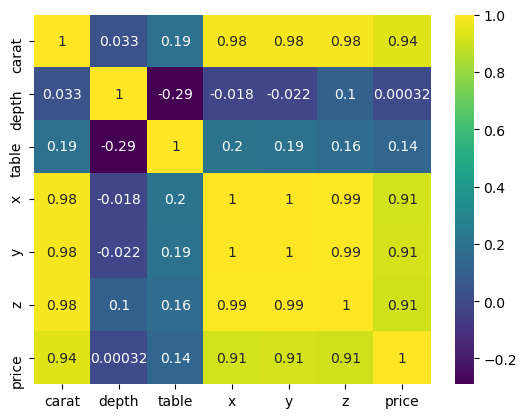

In [27]:
#heatmap of correlation matrix
sns.heatmap(df.corr(),annot=True,cmap="viridis")

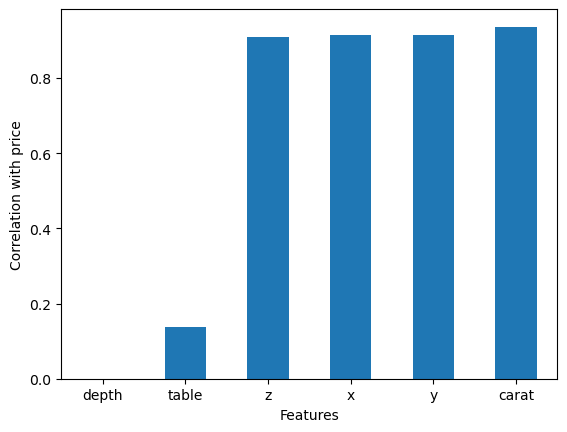

In [28]:
plt.figure(dpi=100)
df.corr()["price"].sort_values()[:-1].plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Features")
plt.ylabel("Correlation with price")
plt.show()

We can deduce that price has maximum correlation with carat, followed closely by y, x and z.

## Bivariate analysis between numerical and categorical variables

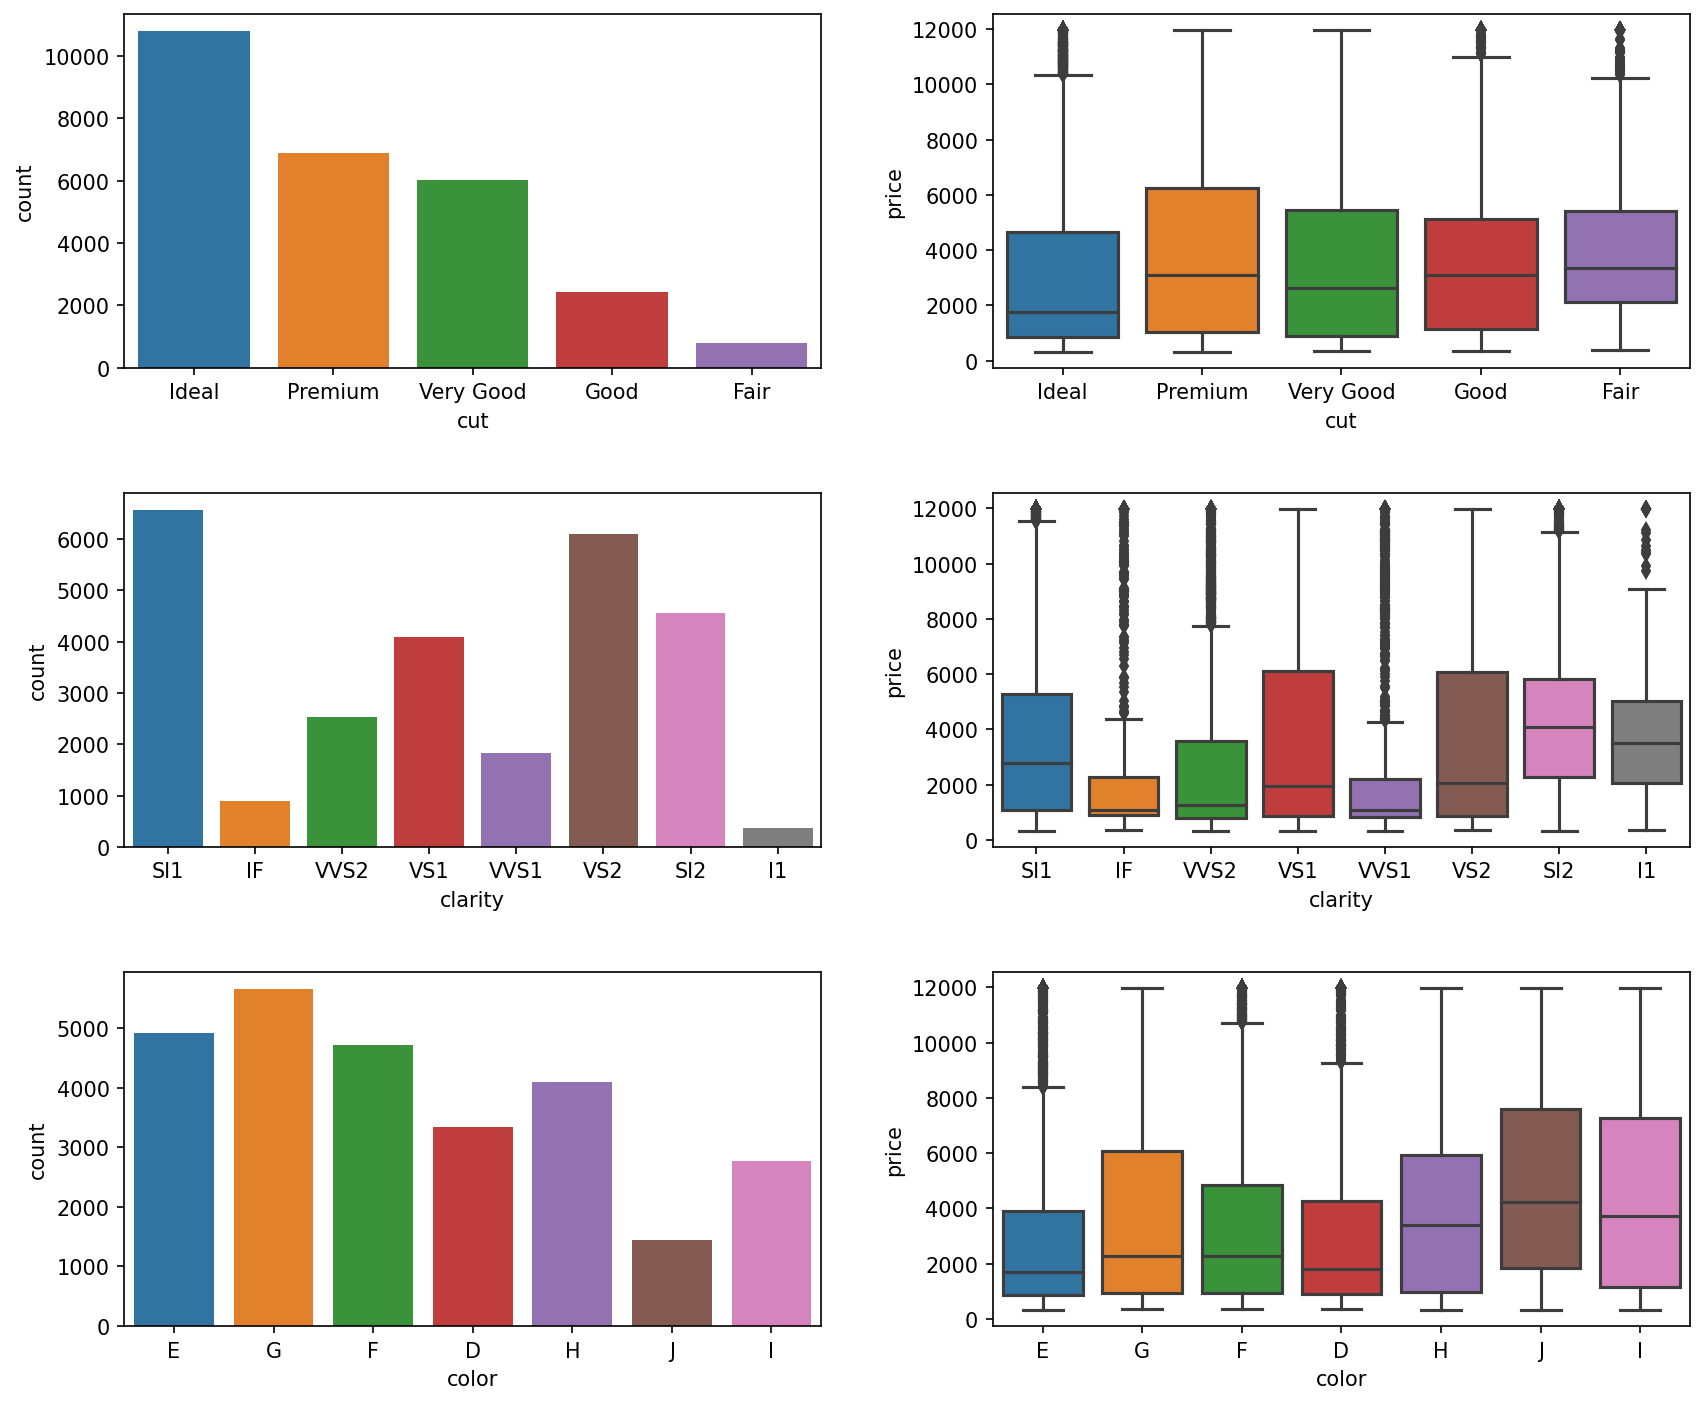

In [29]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12,10),dpi=150)
sns.countplot(ax=axes[0,0],data=df,x="cut")
sns.boxplot(ax=axes[0,1],data=df,x="cut",y="price")
sns.countplot(ax=axes[1,0],data=df,x="clarity")
sns.boxplot(ax=axes[1,1],data=df,x="clarity",y="price")
sns.countplot(ax=axes[2,0],data=df,x="color")
sns.boxplot(ax=axes[2,1],data=df,x="color",y="price")
fig.tight_layout(pad=3.0)
plt.show()

#### 
* cut- Diamonds with the premium cut are most expensive.
* clarity- VS1 and VS2 are the most expensive, followed closely by SI2 and SI1.
* color- J is the most expensive.

## Encoding categorical variables

##### Encoding the "cut" feature

In [30]:
cut_encode = {"Ideal":4,"Premium":3,"Very Good":2,"Good":1,"Fair":0}
for key in cut_encode.keys():
    df["cut"] = np.where(df["cut"]==key,cut_encode[key],df["cut"]) 

In [31]:
df["cut"].value_counts()

4    10805
3     6880
2     6027
1     2434
0      779
Name: cut, dtype: int64

##### Encoding the "color" feature

In [32]:
color_encode = {"D":6,"E":5,"F":4,"G":3,"H":2,"I":1,"J":0}
for key in color_encode.keys():
    df["color"] = np.where(df["color"]==key,color_encode[key],df["color"]) 

In [33]:
df["color"].value_counts()

3    5650
5    4916
4    4722
2    4091
6    3341
1    2765
0    1440
Name: color, dtype: int64

##### Encoding the "clarity" feature

In [34]:
clarity_encode = {"FL":10,"IF":9,"VVS1":8,"VVS2":7,"VS1":6,"VS2":5,"SI1":4,"SI2":3,"I1":2,"I2":1,"I3":0}
for key in clarity_encode.keys():
    df["clarity"] = np.where(df["clarity"]==key,clarity_encode[key],df["clarity"]) 

In [35]:
df["clarity"].value_counts()

4    6564
5    6092
3    4561
6    4086
7    2530
8    1839
9     891
2     362
Name: clarity, dtype: int64

##### Converting the object datatype to float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [37]:
cols = ["cut","color","clarity"]
for col in cols:
    df[col] = df[col].astype("float64")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  float64
 2   color    26925 non-null  float64
 3   clarity  26925 non-null  float64
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.793119,0.461998,0.20,0.40,0.70,1.05,2.025
cut,26925.0,2.909861,1.113127,0.00,2.00,3.00,4.00,4.000
color,26925.0,3.395023,1.706043,0.00,2.00,3.00,5.00,6.000
clarity,26925.0,5.054039,1.646618,2.00,4.00,5.00,6.00,9.000
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.600
table,26925.0,57.435023,2.156704,51.50,56.00,57.00,59.00,63.500
x,26925.0,5.729217,1.125500,3.73,4.71,5.69,6.55,9.310
y,26925.0,5.731159,1.117494,3.71,4.71,5.70,6.54,9.285
z,26925.0,3.537625,0.695681,1.19,2.90,3.52,4.04,5.750
price,26925.0,3734.453965,3466.394724,326.00,945.00,2373.00,5353.00,11965.000


### Identify label and features

The price of the diamond is the "label" and other attributes are "features".

In [40]:
X = df.drop("price",axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,4.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,9.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,7.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,6.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,8.0,60.4,59.0,4.35,4.43,2.65


In [41]:
y = df["price"]
y[:5]

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: price, dtype: float64

### Performing train-test split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (18847, 9)
Shape of y_train: (18847,)
Shape of X_test: (8078, 9)
Shape of y_test: (8078,)


### Linear regression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
model.coef_

array([ 8836.71376805,   104.51251208,   274.95413727,   435.0088991 ,
          36.5652782 ,   -16.20943663, -1105.18219092,  1410.22354702,
       -1092.90727054])

In [47]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [48]:
#Regression coefficients 
pd.Series(model.coef_,index=X.columns,name="Regression Coefficient").sort_values(ascending=False)

carat      8836.713768
y          1410.223547
clarity     435.008899
color       274.954137
cut         104.512512
depth        36.565278
table       -16.209437
z         -1092.907271
x         -1105.182191
Name: Regression Coefficient, dtype: float64

#### We can deduce that the 5 most important features (in descending order) are: 
* carat
* y
* clarity
* color
* cut

In [49]:
y_pred_train =  model.predict(X_train)
y_pred_test = model.predict(X_test)

In [50]:
# R squared on training data
print("R-squared for testing data:",round(model.score(X_train,y_train),2))

R-squared for testing data: 0.93


In [51]:
# R squared on testing data
print("R-squared for testing data:",round(model.score(X_test,y_test),2))

R-squared for testing data: 0.93


In [52]:
train_MSE = round(mean_squared_error(y_train,y_pred_train),2)
test_MSE = round(mean_squared_error(y_test,y_pred_test),2)
print("Train MSE =", train_MSE)
print("Test MSE =",test_MSE)

Train MSE = 830851.79
Test MSE = 812637.92


In [53]:
train_RMSE = round(np.sqrt(train_MSE),2)
test_RMSE = round(np.sqrt(test_MSE),2)
print("Train RMSE =", train_RMSE)
print("Test RMSE =",test_RMSE)

Train RMSE = 911.51
Test RMSE = 901.46


Since the R-squared values for both training and testing data are close to 1, we can conclude that both the lines are *good fits*.

We can also observe that the RMSE for training and testing data are similar, so we have not over-fit the data.

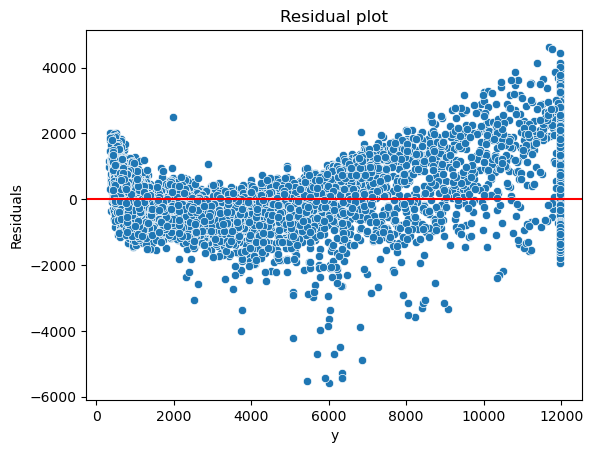

In [54]:
residuals = y_test - y_pred_test
plt.axhline(color='r')
sns.scatterplot(data=df,x=y_test,y=residuals)
plt.title("Residual plot")
plt.xlabel("y")
plt.ylabel("Residuals")
plt.show()

However, we can observe from the residual plot that some data points correspond to higher residual values.
This might mean that a curve will act as a better fit to the data rather than a line.

### Polynomial Regression

In [55]:
#Running a for loop to decide an optimal degree of polynomial
train_RMSE_errors = list()
test_RMSE_errors = list()

for d in range(1,5):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    poly_model = LinearRegression(fit_intercept=True)
    poly_model.fit(X_train,y_train)
    
    pred_train = poly_model.predict(X_train)
    pred_test = poly_model.predict(X_test)
    
    train_RMSE  = np.sqrt(mean_squared_error(y_train,pred_train))
    test_RMSE  = np.sqrt(mean_squared_error(y_test,pred_test))
    
    train_RMSE_errors.append(train_RMSE)
    test_RMSE_errors.append(test_RMSE)

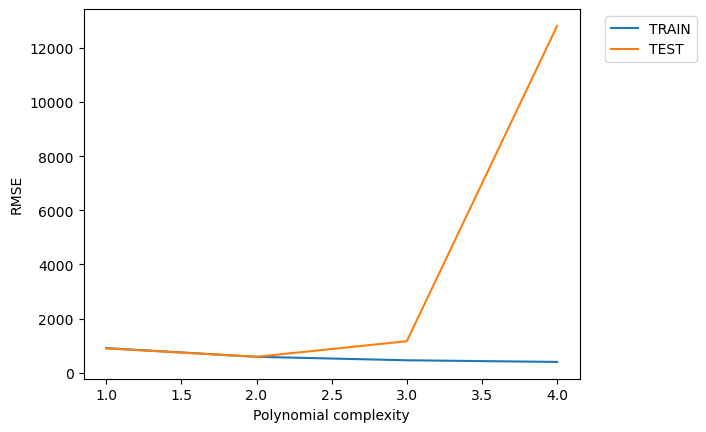

In [56]:
plt.plot(range(1,5),train_RMSE_errors,label="TRAIN")
plt.plot(range(1,5),test_RMSE_errors,label="TEST")
plt.xlabel("Polynomial complexity")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor = (1.25,1))

We can deduce that the model shows good accuracy for degree=2 and the difference between train RMSE and test RMSE is the least. 

We will therefore, deploy a polynomial model of degree 2 as shown below.

In [57]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [58]:
final_poly_features = final_poly_converter.fit_transform(X)
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)

In [59]:
final_poly_model = LinearRegression(fit_intercept=True)
final_poly_model.fit(poly_X_train,poly_y_train)

LinearRegression()

In [60]:
y_pred_poly = final_poly_model.predict(poly_X_test)

In [61]:
RMSE = np.sqrt(mean_squared_error(poly_y_test,y_pred_poly))
round(RMSE,2)

590.35

* RMSE of linear regression = 901.46
* RMSE of polynomial regression = 590.35 

Hence, the polynomial model is more accurate for predicting the price of the diamond.

In [62]:
print("R-squared for polynomial model:",round(final_poly_model.score(poly_X_test,poly_y_test),2))

R-squared for polynomial model: 0.97


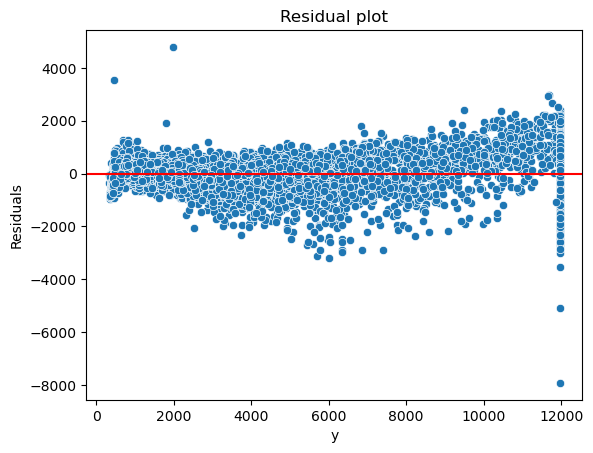

In [63]:
residuals = poly_y_test - y_pred_poly
plt.axhline(color='r')
sns.scatterplot(data=df,x=y_test,y=residuals)
plt.title("Residual plot")
plt.xlabel("y")
plt.ylabel("Residuals")
plt.show()

We can conclude that the polynomial model is a better and more accurate fit than the linear model for diamond price prediction.